In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy
import seaborn as sns
from scipy import stats
import harry_plotter as hp

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [2]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/final_plots/cw_mass_split/'

# initiating catalog class objects.
total = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath, version='mpl9', sigma=3)
total_cen = copy.deepcopy(total) ; total_sat = copy.deepcopy(total)
total_high_mass = copy.deepcopy(total) ; total_low_mass = copy.deepcopy(total) ; total_mid_mass = copy.deepcopy(total)

total_cen.group_membership(sel='cen', group_cat='lim') 
total_sat.group_membership(sel='sat', group_cat='lim') 
total_cen_high_mass = copy.deepcopy(total_cen) ; total_cen_low_mass = copy.deepcopy(total_cen) ; total_cen_mid_mass = copy.deepcopy(total_cen)
total_sat_high_mass = copy.deepcopy(total_sat) ; total_sat_low_mass = copy.deepcopy(total_sat) ; total_sat_mid_mass = copy.deepcopy(total_sat)

# also splitting on stellar mass in 
high_mass_split = 10.4 ; low_mass_split = 9.7

total_low_mass.df = total_low_mass.df[total_low_mass.df.nsa_elpetro_mass_logscale <= low_mass_split]
total_mid_mass.df = total_mid_mass.df[(total_mid_mass.df.nsa_elpetro_mass_logscale > low_mass_split) & (total_mid_mass.df.nsa_elpetro_mass_logscale < high_mass_split)]
total_high_mass.df = total_high_mass.df[total_high_mass.df.nsa_elpetro_mass_logscale >= high_mass_split]

total_cen_low_mass.df = total_cen_low_mass.df[total_cen_low_mass.df.nsa_elpetro_mass_logscale <= low_mass_split]
total_cen_mid_mass.df = total_cen_mid_mass.df[(total_cen_mid_mass.df.nsa_elpetro_mass_logscale > low_mass_split) & (total_cen_mid_mass.df.nsa_elpetro_mass_logscale < high_mass_split)]
total_cen_high_mass.df = total_cen_high_mass.df[total_cen_high_mass.df.nsa_elpetro_mass_logscale >= high_mass_split]

total_sat_low_mass.df = total_sat_low_mass.df[total_sat_low_mass.df.nsa_elpetro_mass_logscale <= low_mass_split]
total_sat_mid_mass.df = total_sat_mid_mass.df[(total_sat_mid_mass.df.nsa_elpetro_mass_logscale > low_mass_split) & (total_sat_mid_mass.df.nsa_elpetro_mass_logscale < high_mass_split)]
total_sat_high_mass.df = total_sat_high_mass.df[total_sat_high_mass.df.nsa_elpetro_mass_logscale >= high_mass_split]


### As a function of $D_{node}$

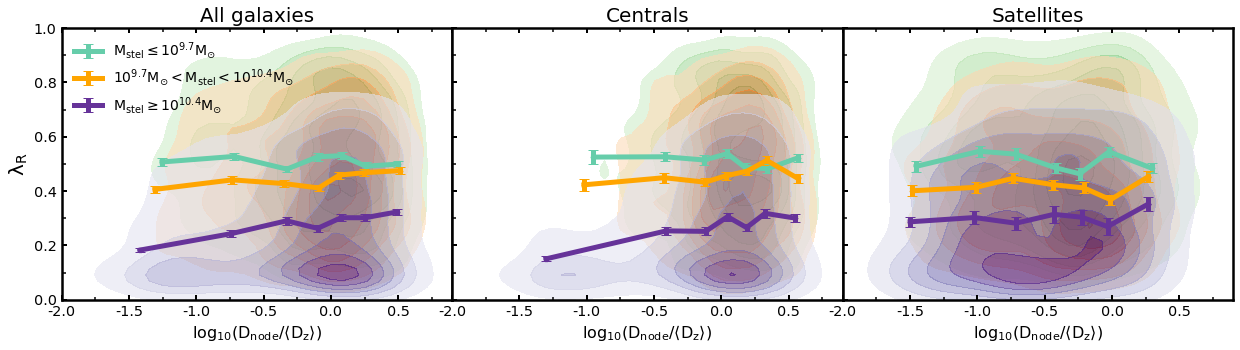

In [4]:
x_percentiles = [14.2, 28.4, 42.6, 56.8, 71, 85.2]
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(total.df.log_dnode_norm.values, x_percentiles)

#sns.kdeplot(total.df.log_dnode_norm, total.df.Lambda_Re, ax=ax[0], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(total_low_mass.df.log_dnode_norm, total_low_mass.df.Lambda_Re, ax=ax[0], cmap="Greens", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_mid_mass.df.log_dnode_norm, total_mid_mass.df.Lambda_Re, ax=ax[0], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_high_mass.df.log_dnode_norm, total_high_mass.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

#total.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
total_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
total_mid_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[0], colors=['orange'])
total_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \geq 10^{10.4}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(total_cen.df.log_dnode_norm.values, x_percentiles)

#sns.kdeplot(total_cen.df.log_dnode_norm, total_cen.df.Lambda_Re, ax=ax[1], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(total_cen_low_mass.df.log_dnode_norm, total_cen_low_mass.df.Lambda_Re, ax=ax[1], cmap="Greens", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_cen_mid_mass.df.log_dnode_norm, total_cen_mid_mass.df.Lambda_Re, ax=ax[1], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_cen_high_mass.df.log_dnode_norm, total_cen_high_mass.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

#total_cen.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
total_cen_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
total_cen_mid_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[1], colors=['orange'])
total_cen_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \geq 10^{10.4}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(total_sat.df.log_dnode_norm.values, x_percentiles)

#sns.kdeplot(total_sat.df.log_dnode_norm, total_sat.df.Lambda_Re, ax=ax[2], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(total_sat_low_mass.df.log_dnode_norm, total_sat_low_mass.df.Lambda_Re, ax=ax[2], cmap="Greens", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_sat_mid_mass.df.log_dnode_norm, total_sat_mid_mass.df.Lambda_Re, ax=ax[2], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_sat_high_mass.df.log_dnode_norm, total_sat_high_mass.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

#total_sat.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])
total_sat_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
total_sat_mid_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[2], colors=['orange'])
total_sat_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \geq 10^{10.4}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All galaxies', 'Centrals', 'Satellites']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{node} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-2, 0.9])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)

hp.xtick_format(0.5, 0.25, ax[0], '%1.1f')
hp.ytick_format(0.2, 0.1, ax[0], '%1.1f')
#plt.savefig(outpath+'lambdaR_dnode_mass_split_5sigma.pdf', bbox_inches='tight', format='pdf')


(array([[-1.81788252],
       [-1.02348522],
       [-0.69360853],
       [-0.41937731],
       [-0.21965353],
       [-0.00247648],
       [ 0.31618141]]), array([[10.89219704],
       [10.89633052],
       [10.794116  ],
       [10.78583309],
       [10.76658385],
       [10.749154  ],
       [10.73755359]]), array([[0.01366914],
       [0.02220007],
       [0.02796967],
       [0.02103106],
       [0.01744522],
       [0.01320172],
       [0.00971503]]))


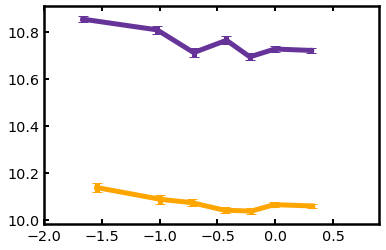

In [14]:
fig, ax = plt.subplots()
print(total_cen_high_mass.compute_binned_percentile_three_props("log_dnode_norm", "nsa_elpetro_mass_logscale", "log_dnode_norm", x_bins, z_percentiles))
total_mid_mass.plot_binned_percentiles_three_props("log_dnode_norm", "nsa_elpetro_mass_logscale", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax, colors=['orange'])
total_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "nsa_elpetro_mass_logscale", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \geq 10^{10.4}M_{\odot}}$', ax, colors=['rebeccapurple'])
ax.set_xlim([-2, 0.9])
plt.show()

### As a function of $D_{skel}$

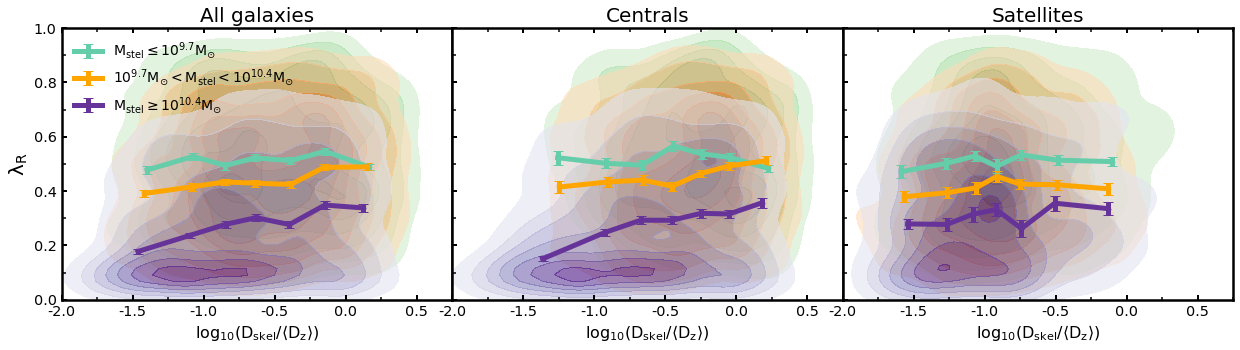

In [12]:
x_percentiles = [14.2, 28.4, 42.6, 56.8, 71, 85.2]
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(total.df.log_dskel_norm.values, x_percentiles)

#sns.kdeplot(total.df.log_dskel_norm, total.df.Lambda_Re, ax=ax[0], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(total_low_mass.df.log_dskel_norm, total_low_mass.df.Lambda_Re, ax=ax[0], cmap="Greens", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_mid_mass.df.log_dskel_norm, total_mid_mass.df.Lambda_Re, ax=ax[0], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_high_mass.df.log_dskel_norm, total_high_mass.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

#total.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
total_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
total_mid_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[0], colors=['orange'])
total_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \geq 10^{10.4}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(total_cen.df.log_dskel_norm.values, x_percentiles)

#sns.kdeplot(total_cen.df.log_dskel_norm, total_cen.df.Lambda_Re, ax=ax[1], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(total_cen_low_mass.df.log_dskel_norm, total_cen_low_mass.df.Lambda_Re, ax=ax[1], cmap="Greens", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_cen_mid_mass.df.log_dskel_norm, total_cen_mid_mass.df.Lambda_Re, ax=ax[1], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_cen_high_mass.df.log_dskel_norm, total_cen_high_mass.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

#total_cen.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
total_cen_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
total_cen_mid_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[1], colors=['orange'])
total_cen_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \geq 10^{10.4}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(total_sat.df.log_dskel_norm.values, x_percentiles)

#sns.kdeplot(total_sat.df.log_dskel_norm, total_sat.df.Lambda_Re, ax=ax[2], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(total_sat_low_mass.df.log_dskel_norm, total_sat_low_mass.df.Lambda_Re, ax=ax[2], cmap="Greens", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_sat_mid_mass.df.log_dskel_norm, total_sat_mid_mass.df.Lambda_Re, ax=ax[2], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_sat_high_mass.df.log_dskel_norm, total_sat_high_mass.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

#total_sat.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])
total_sat_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
total_sat_mid_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[2], colors=['orange'])
total_sat_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \geq 10^{10.4}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All galaxies', 'Centrals', 'Satellites']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{skel} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-2, 0.75])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)

hp.xtick_format(0.5, 0.25, ax[0], '%1.1f')
hp.ytick_format(0.2, 0.1, ax[0], '%1.1f')
#plt.savefig(outpath+'lambdaR_dskel_mass_split_5sigma.pdf', bbox_inches='tight', format='pdf')


### As a function of $D_{skel}$ having removed the nodes

In [14]:
node_dist = 0.5

total_filament = copy.deepcopy(total) 
total_cen_filament = copy.deepcopy(total_cen)
total_sat_filament = copy.deepcopy(total_sat)
total_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
total_cen_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
total_sat_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

total_low_mass_filament = copy.deepcopy(total_low_mass) 
total_cen_low_mass_filament = copy.deepcopy(total_cen_low_mass)
total_sat_low_mass_filament = copy.deepcopy(total_sat_low_mass)
total_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
total_cen_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
total_sat_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

total_mid_mass_filament = copy.deepcopy(total_mid_mass) 
total_cen_mid_mass_filament = copy.deepcopy(total_cen_mid_mass)
total_sat_mid_mass_filament = copy.deepcopy(total_sat_mid_mass)
total_mid_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
total_cen_mid_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
total_sat_mid_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

total_high_mass_filament = copy.deepcopy(total_high_mass) 
total_cen_high_mass_filament = copy.deepcopy(total_cen_high_mass)
total_sat_high_mass_filament = copy.deepcopy(total_sat_high_mass)
total_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
total_cen_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
total_sat_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

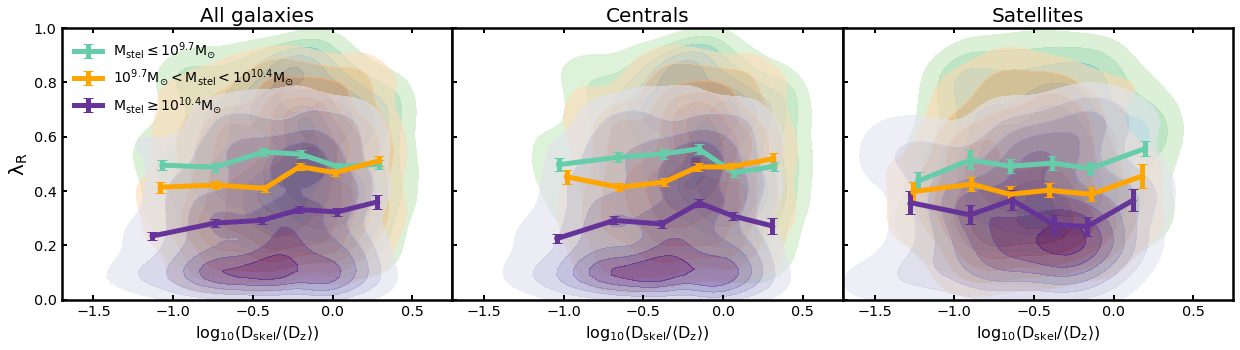

In [15]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(total_filament.df.log_dskel_norm.values, np.linspace(10, 90, 5))

sns.kdeplot(total_low_mass_filament.df.log_dskel_norm, total_low_mass_filament.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(total_mid_mass_filament.df.log_dskel_norm, total_mid_mass_filament.df.Lambda_Re, ax=ax[0], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_high_mass_filament.df.log_dskel_norm, total_high_mass_filament.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

total_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
total_mid_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[0], colors=['orange'])
total_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \geq 10^{10.4}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(total_cen_filament.df.log_dskel_norm.values, np.linspace(10, 90, 5))

sns.kdeplot(total_cen_low_mass_filament.df.log_dskel_norm, total_cen_low_mass_filament.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(total_cen_mid_mass_filament.df.log_dskel_norm, total_cen_mid_mass_filament.df.Lambda_Re, ax=ax[1], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_cen_high_mass_filament.df.log_dskel_norm, total_cen_high_mass_filament.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

total_cen_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
total_cen_mid_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[1], colors=['orange'])
total_cen_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.4}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(total_sat_filament.df.log_dskel_norm.values, np.linspace(10, 90, 5))

sns.kdeplot(total_sat_low_mass_filament.df.log_dskel_norm, total_sat_low_mass_filament.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(total_sat_mid_mass_filament.df.log_dskel_norm, total_sat_mid_mass_filament.df.Lambda_Re, ax=ax[2], cmap="Oranges", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)
sns.kdeplot(total_sat_high_mass_filament.df.log_dskel_norm, total_sat_high_mass_filament.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

total_sat_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{9.7}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
total_sat_mid_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{10^{9.7}M_{\odot} < M_{stel} < 10^{10.4}M_{\odot}}$', ax[2], colors=['orange'])
total_sat_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.4}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All galaxies', 'Centrals', 'Satellites']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{skel} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-1.7, 0.75])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
#plt.savefig(outpath+'lambdaR_dskel_no_node_mass_split_5sigma.pdf', bbox_inches='tight', format='pdf')
